In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

df = pd.read_csv('C:/Users/HOANG NAM/Desktop/Khai thác DL/titanic.csv')
df.head(12)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 107.5+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [2]:
total = df.isnull().sum().sort_values(ascending = False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
body,1189,90.8
cabin,1015,77.5
boat,824,62.9
home.dest,565,43.1
age,264,20.2


c:\users\hoang nam\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hoang nam\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hoang nam\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

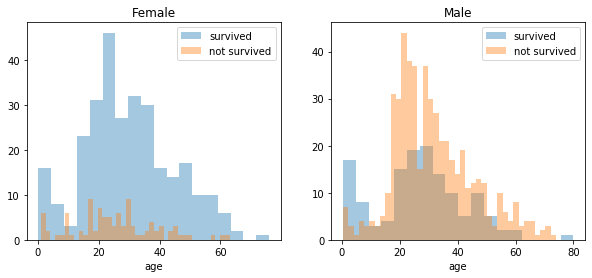

In [3]:
survived = 'survived'
not_survived = 'not survived'
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(),bins=18,label=survived,ax = axes[0],kde=False)
ax = sns.distplot(women[women['survived']==0].age.dropna(),bins=40,label=not_survived,ax = axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(),bins=18,label=survived,ax = axes[1],kde=False)
ax = sns.distplot(men[men['survived']==0].age.dropna(),bins=40,label=not_survived,ax = axes[1],kde=False)
ax.legend()
_=ax.set_title('Male')

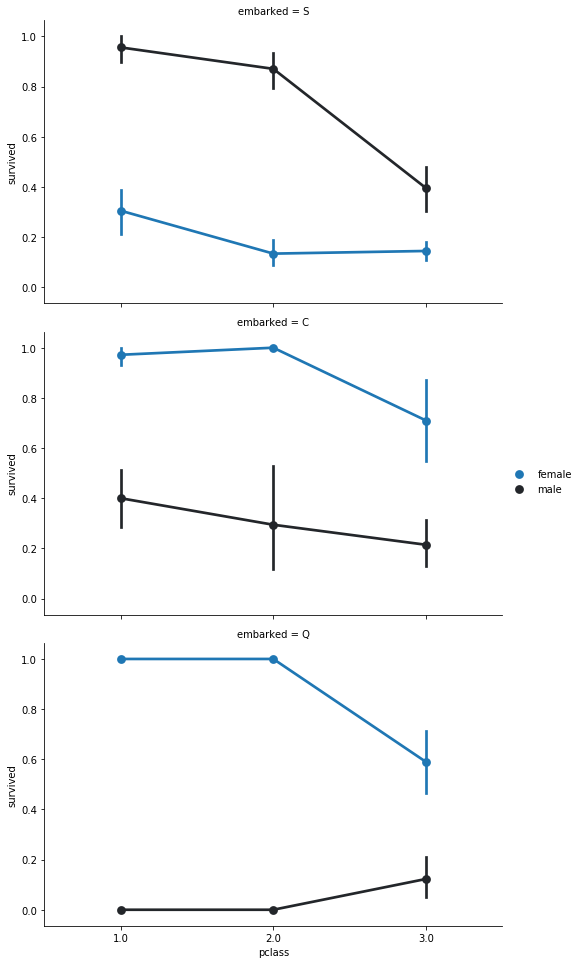

In [4]:
FacetGrid = sns.FacetGrid(df,row='embarked',height=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass','survived','sex', palette=None,order=None,hue_order=None)
FacetGrid.add_legend()

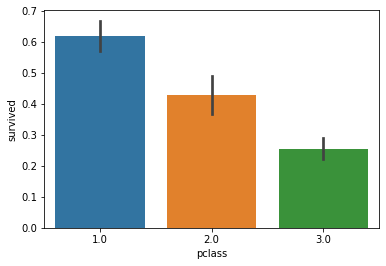

In [5]:
sns.barplot(x='pclass',y='survived',data=df)

c:\users\hoang nam\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hoang nam\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


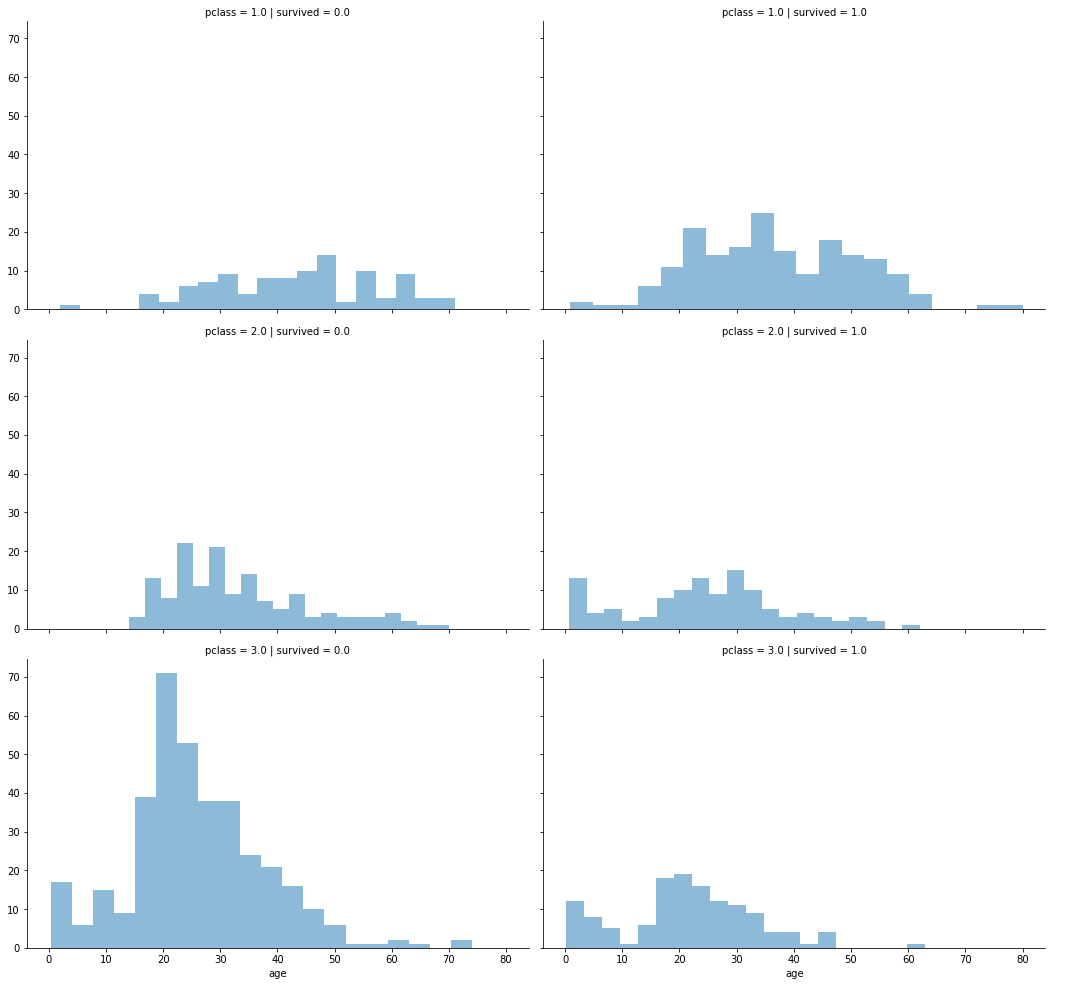

In [6]:
grid =sns.FacetGrid(df, col='survived',row='pclass',height=4.6,aspect=1.6)
grid.map(plt.hist,'age',alpha=.5,bins=20)
grid.add_legend()

In [7]:

for dataset in df:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

TypeError: string indices must be integers

In [8]:
for dataset in df:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

TypeError: string indices must be integers

In [9]:
for dataset in df:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
df['not_alone'].value_counts()

TypeError: string indices must be integers

In [10]:
for dataset in [df]:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
df['not_alone'].value_counts()

1.0    790
0.0    519
Name: not_alone, dtype: int64

c:\users\hoang nam\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\hoang nam\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


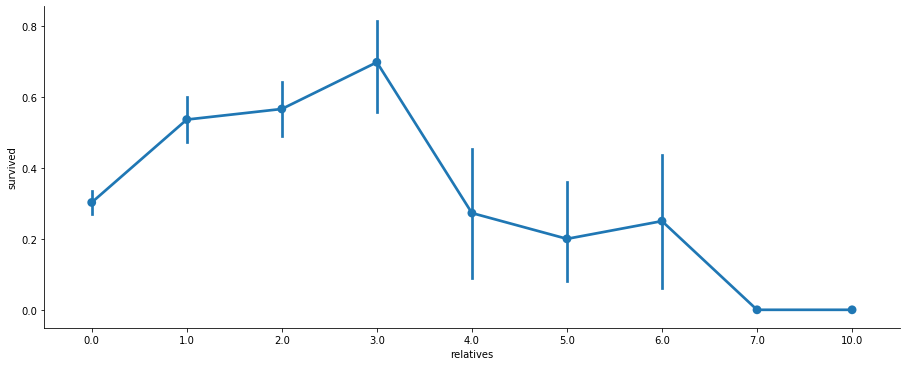

In [11]:
axes = sns.factorplot('relatives','survived', 
                      data=df, aspect = 2.5, )

In [12]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in [df]:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)
# we can now drop the cabin feature
df = df.drop(['cabin'], axis=1)

In [13]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [14]:
df = df.drop(['ticket'],axis=1)
df = df.drop(['boat'],axis=1)
df = df.drop(['body'],axis=1)
df = df.drop(['home.dest'],axis=1)

In [15]:
for dataset in [df]:
    mean = df["age"].mean()
    std = df["age"].std()
    is_null = dataset["age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["age"] = age_slice
    dataset["age"] = df["age"].astype(int)
df["age"].isnull().sum()

0

In [16]:
df['embarked'].describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1310 non-null   int32  
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   fare       1308 non-null   float64
 8   embarked   1307 non-null   object 
 9   relatives  1309 non-null   float64
 10  not_alone  1309 non-null   float64
 11  deck       1310 non-null   int32  
dtypes: float64(7), int32(2), object(3)
memory usage: 97.3+ KB


In [17]:
df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [18]:
for dataset in [df]:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [19]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in [df]:
    # extract titles
    dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['title'] = dataset['title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['title'] = dataset['title'].fillna(0)
df = df.drop(['name'], axis=1)

In [20]:
genders = {"male": 0, "female": 1}
for dataset in [df]:
    dataset['sex'] = dataset['sex'].map(genders)

In [21]:
ports = {"S": 0, "C": 1, "Q": 2}
for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [22]:
for dataset in [df]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[ dataset['age'] > 66, 'age'] = 7

In [23]:
df['age'].value_counts()

6    235
4    233
3    219
5    196
2    178
1    149
0     91
7      9
Name: age, dtype: int64

In [24]:
for dataset in [df]:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare']   = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare']   = 4
    dataset.loc[ dataset['fare'] > 250, 'fare'] = 5
    dataset['fare'] = dataset['fare'].astype(int)

In [25]:
for dataset in [df]:
    dataset['age_class']= dataset['age']* dataset['pclass']

In [26]:
for dataset in [df]:
    dataset['fare_per_person'] = dataset['fare']/(dataset['relatives']+1)
    dataset['fare_per_erson'] = dataset['fare_per_person'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [27]:
for dataset in [df]:
    dataset['fare_per_person'] = dataset['fare']/(dataset['relatives']+1)
    dataset['fare_per_person'] = dataset['fare_per_person'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [28]:
for dataset in [df]:
    dataset['fare_per_person'] = dataset['fare']/(dataset['relatives']+1)

In [29]:
train_df.head(10)

NameError: name 'train_df' is not defined

In [31]:
df.head(30)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title,age_class,fare_per_person
0,1.0,1.0,1.0,4,0.0,0.0,4,0.0,0.0,1.0,2,2.0,4.0,4.0
1,1.0,1.0,0.0,0,1.0,2.0,4,0.0,3.0,0.0,3,4.0,0.0,1.0
2,1.0,0.0,1.0,0,1.0,2.0,4,0.0,3.0,0.0,3,2.0,0.0,1.0
3,1.0,0.0,0.0,4,1.0,2.0,4,0.0,3.0,0.0,3,1.0,4.0,1.0
4,1.0,0.0,1.0,3,1.0,2.0,4,0.0,3.0,0.0,3,3.0,3.0,1.0
5,1.0,1.0,0.0,6,0.0,0.0,2,0.0,0.0,1.0,5,1.0,6.0,2.0
6,1.0,1.0,1.0,6,1.0,0.0,3,0.0,1.0,0.0,4,2.0,6.0,1.5
7,1.0,0.0,0.0,5,0.0,0.0,0,0.0,0.0,1.0,1,1.0,5.0,0.0
8,1.0,1.0,1.0,6,2.0,0.0,3,0.0,2.0,0.0,3,3.0,6.0,1.0
9,1.0,0.0,0.0,7,0.0,0.0,3,1.0,0.0,1.0,8,1.0,7.0,3.0
